# Stacked autoencoder

This is a tactic to producd a low dimensional visulalization of a very high dimension set, in this case the MNIST fashion data set

We will reduce the dimension using an autoencoder and then further reduce it using t-SNE

"Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow, 2nd Edition",  A. Geron,  O'Reilly


Checked on 1/18/2023

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [6]:
fashion_mnist = fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

Be sure to always scale or standardize data when working with autoencoders, they always seem to fail if you don't

In [8]:
X_train_full=X_train_full/255
X_test=X_test/255

Okay, here are the encoder and decoder pair

The encoder is going from 784 variables down to 30, that's quite a reduction

In [9]:
stacked_encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="selu"),
    tf.keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="selu", input_shape=[30]),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

stacked_ae = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.SGD(lr=1.5))

history = stacked_ae.fit(X_train_full, X_train_full, epochs=20,
                         validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6495 - val_loss: 0.5778
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5278 - val_loss: 0.5038
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4960 - val_loss: 0.4907
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4838 - val_loss: 0.4776
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4671 - val_loss: 0.4563
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4421 - val_loss: 0.4295
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4165 - val_loss: 0.4067
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3975 - val_loss: 0.3918
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3859 - val_loss: 0.3833
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3

Now we can plot some images and some reconstructions of the images using the encoder-decoder pair

1/1 [==============================] - 0s 121ms/step


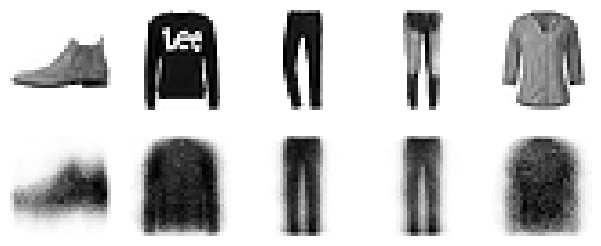

In [11]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_test[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_test[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

In [12]:
from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_test_compressed)

313/313 [==============================] - 1s 3ms/step


<ipython-input-13-3f5ee9261eaf>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_valid_2D[y_test==0, 0], X_valid_2D[y_test==0, 1], c='r', s=10, cmap="tab10",label="T-shirt")
<ipython-input-13-3f5ee9261eaf>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_valid_2D[y_test==1, 0], X_valid_2D[y_test==1, 1], c='b', s=10, cmap="tab10",label="Trouser")
<ipython-input-13-3f5ee9261eaf>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_valid_2D[y_test==2, 0], X_valid_2D[y_test==2, 1], c='g', s=10, cmap="tab10",label="Pullover")
<ipython-input-13-3f5ee9261eaf>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_valid_2D[y_test==3, 0], X_valid_2D[y_test==3, 1], c='k', s=10, cmap="tab10",label="Dress")
<ipython-input-13-3f5ee9261eaf>:6: UserWarning: No data for color

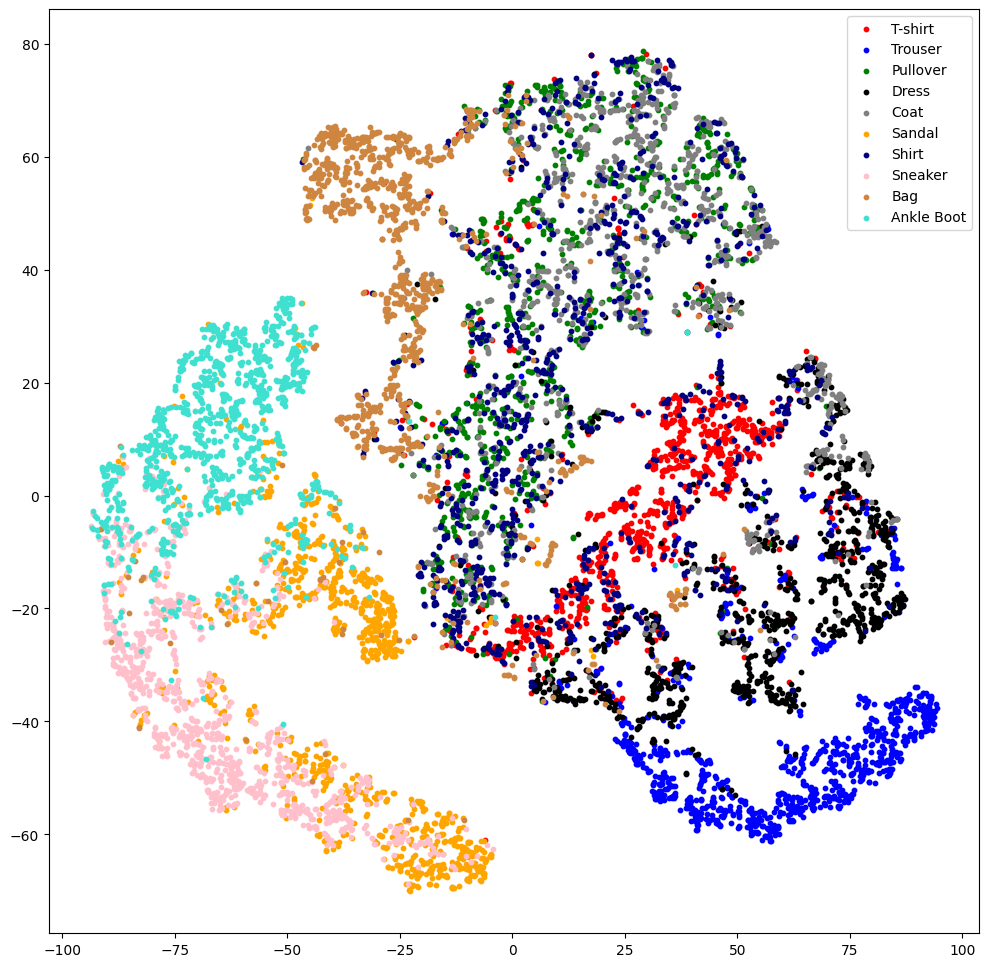

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(X_valid_2D[y_test==0, 0], X_valid_2D[y_test==0, 1], c='r', s=10, cmap="tab10",label="T-shirt")
plt.scatter(X_valid_2D[y_test==1, 0], X_valid_2D[y_test==1, 1], c='b', s=10, cmap="tab10",label="Trouser")
plt.scatter(X_valid_2D[y_test==2, 0], X_valid_2D[y_test==2, 1], c='g', s=10, cmap="tab10",label="Pullover")
plt.scatter(X_valid_2D[y_test==3, 0], X_valid_2D[y_test==3, 1], c='k', s=10, cmap="tab10",label="Dress")
plt.scatter(X_valid_2D[y_test==4, 0], X_valid_2D[y_test==4, 1], c='grey', s=10, cmap="tab10",label="Coat")
plt.scatter(X_valid_2D[y_test==5, 0], X_valid_2D[y_test==5, 1], c='orange', s=10, cmap="tab10",label="Sandal")
plt.scatter(X_valid_2D[y_test==6, 0], X_valid_2D[y_test==6, 1], c='navy', s=10, cmap="tab10",label="Shirt")
plt.scatter(X_valid_2D[y_test==7, 0], X_valid_2D[y_test==7, 1], c='pink', s=10, cmap="tab10",label="Sneaker")
plt.scatter(X_valid_2D[y_test==8, 0], X_valid_2D[y_test==8, 1], c='peru', s=10, cmap="tab10",label="Bag")
plt.scatter(X_valid_2D[y_test==9, 0], X_valid_2D[y_test==9, 1], c='turquoise', s=10, cmap="tab10",label="Ankle Boot")


plt.legend()